訓練模型

In [435]:
#%%
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model, save_model
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau, Callback, EarlyStopping
from keras import regularizers

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer

import joblib
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import os

#載入訓練資料
device = 'L8'
SourceData = pd.read_csv(f"..//Data//MergedSorted//{device}_Merged_Sorted.csv")


In [436]:
one_hot_encode_features = [
    # 'Device_ID',
    # 'Year',
    'Month',
    'Day',
    'Hour',
    'Minute',
]

input_features_model_1 = to_predict_features_model_1 = [
    # 'Avg_WindSpeed(m/s)',
    # 'Avg_Pressure(hpa)',
    'Avg_Temperature(°C)',
    'Avg_Humidity(%)',
    'Avg_Sunlight(Lux)',
    'Avg_Power(mW)',
    
    # 'Avg_Diff_WindSpeed(m/s)',
    # 'Avg_Diff_Pressure(hpa)',
    'Avg_Diff_Temperature(°C)',
    'Avg_Diff_Humidity(%)',
    'Avg_Diff_Sunlight(Lux)',
    'Avg_Diff_Power(mW)',
    
    # 'Avg_Lag_1_WindSpeed(m/s)',
    # 'Avg_Lag_2_WindSpeed(m/s)',
    # 'Avg_Lag_1_Pressure(hpa)',
    # 'Avg_Lag_2_Pressure(hpa)',
    'Avg_Lag_1_Temperature(°C)',
    'Avg_Lag_2_Temperature(°C)',
    'Avg_Lag_3_Temperature(°C)',
    'Avg_Lag_4_Temperature(°C)',
    'Avg_Lag_1_Humidity(%)',
    'Avg_Lag_2_Humidity(%)',
    'Avg_Lag_3_Humidity(%)',
    'Avg_Lag_4_Humidity(%)',
    'Avg_Lag_1_Sunlight(Lux)',
    'Avg_Lag_2_Sunlight(Lux)',
    'Avg_Lag_3_Sunlight(Lux)',
    'Avg_Lag_4_Sunlight(Lux)',
    'Avg_Lag_1_Power(mW)',
    'Avg_Lag_2_Power(mW)',
    'Avg_Lag_3_Power(mW)',
    'Avg_Lag_4_Power(mW)',
    
    'Avg_Sin_Hour',
    'Avg_Cos_Hour',
    'Avg_Sin_Minute',
    'Avg_Cos_Minute',
    
    # 'Max_WindSpeed(m/s)',
    # 'Max_Pressure(hpa)',
    'Max_Temperature(°C)',
    'Max_Humidity(%)',
    'Max_Sunlight(Lux)',
    'Max_Power(mW)',
    'Max_Diff_WindSpeed(m/s)',
    'Max_Diff_Pressure(hpa)',
    'Max_Diff_Temperature(°C)',
    'Max_Diff_Humidity(%)',
    'Max_Diff_Sunlight(Lux)',
    'Max_Diff_Power(mW)',
    
    # 'Max_Lag_1_WindSpeed(m/s)',
    # 'Max_Lag_2_WindSpeed(m/s)',
    # 'Max_Lag_1_Pressure(hpa)',
    # 'Max_Lag_2_Pressure(hpa)',
    'Max_Lag_1_Temperature(°C)',
    'Max_Lag_2_Temperature(°C)',
    'Max_Lag_3_Temperature(°C)',
    'Max_Lag_4_Temperature(°C)',
    'Max_Lag_1_Humidity(%)',
    'Max_Lag_2_Humidity(%)',
    'Max_Lag_3_Humidity(%)',
    'Max_Lag_4_Humidity(%)',
    'Max_Lag_1_Sunlight(Lux)',
    'Max_Lag_2_Sunlight(Lux)',
    'Max_Lag_3_Sunlight(Lux)',
    'Max_Lag_4_Sunlight(Lux)',
    'Max_Lag_1_Power(mW)',
    'Max_Lag_2_Power(mW)',
    'Max_Lag_3_Power(mW)',
    'Max_Lag_4_Power(mW)',
    
    'Max_Sin_Hour',
    'Max_Cos_Hour',
    'Max_Sin_Minute',
    'Max_Cos_Minute',
    
    # 'Min_WindSpeed(m/s)',
    # 'Min_Pressure(hpa)',
    'Min_Temperature(°C)',
    'Min_Humidity(%)',
    'Min_Sunlight(Lux)',
    'Min_Power(mW)',
    
    # 'Min_Diff_WindSpeed(m/s)',
    # 'Min_Diff_Pressure(hpa)',
    'Min_Diff_Temperature(°C)',
    'Min_Diff_Humidity(%)',
    'Min_Diff_Sunlight(Lux)',
    'Min_Diff_Power(mW)',
    
    # 'Min_Lag_1_WindSpeed(m/s)',
    # 'Min_Lag_2_WindSpeed(m/s)',
    # 'Min_Lag_1_Pressure(hpa)',
    # 'Min_Lag_2_Pressure(hpa)',
    'Min_Lag_1_Temperature(°C)',
    'Min_Lag_2_Temperature(°C)',
    'Min_Lag_3_Temperature(°C)',
    'Min_Lag_4_Temperature(°C)',
    'Min_Lag_1_Humidity(%)',
    'Min_Lag_2_Humidity(%)',
    'Min_Lag_3_Humidity(%)',
    'Min_Lag_4_Humidity(%)',
    'Min_Lag_1_Sunlight(Lux)',
    'Min_Lag_2_Sunlight(Lux)',
    'Min_Lag_3_Sunlight(Lux)',
    'Min_Lag_4_Sunlight(Lux)',
    'Min_Lag_1_Power(mW)',
    'Min_Lag_2_Power(mW)',
    'Min_Lag_3_Power(mW)',
    'Min_Lag_4_Power(mW)',
    
    'Min_Sin_Hour',
    'Min_Cos_Hour',
    'Min_Sin_Minute',
    'Min_Cos_Minute'
]

SourceData = SourceData[['SeqNumber'] + to_predict_features_model_1 + one_hot_encode_features]
SourceData = pd.get_dummies(SourceData, columns=one_hot_encode_features, dtype='int')

In [437]:
def create_dataset(data, LookBackNum):
    X = []
    y = []

    #設定每i-12筆資料(X_train)就對應到第i筆資料(y_train)
    for i in range(LookBackNum,len(data)):
        X.append(data[i-LookBackNum:i, :])
        y.append(data[i, :])

    return np.array(X), np.array(y)
  
#設定LSTM往前看的筆數和預測筆數
n_timesteps = LookBackNum = 45 #LSTM往前看的筆數，一筆10分鐘


preprocess_pipe = make_pipeline(
    MinMaxScaler(),
    # PCA(n_components=11),
)

SourceData_encode = SourceData.copy()
SourceData_encode.dropna(inplace=True)
#正規化
SourceData_encode[to_predict_features_model_1] = preprocess_pipe.fit_transform(SourceData_encode[to_predict_features_model_1])


X_train, _ = create_dataset(SourceData_encode.drop(columns='SeqNumber').values, LookBackNum=LookBackNum)
_, y_train = create_dataset(SourceData_encode[to_predict_features_model_1].values, LookBackNum=LookBackNum)

n_features = X_train.shape[2]
n_prediction = y_train.shape[1]

# Reshaping
#(samples 是訓練樣本數量,timesteps 是每個樣本的時間步長,features 是每個時間步的特徵數量)
X_train = np.reshape(X_train,(X_train.shape[0], n_timesteps, n_features))
X_train.shape

(11945, 45, 146)

In [438]:

#%%
#============================建置&訓練「LSTM模型」============================
#建置LSTM模型
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
    )

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,     # 衰減率
    patience=5,    
    min_lr=1e-9
    )

def build_lstm_model(n_timesteps, n_features, n_prediction):
    model = Sequential()
    
    model.add(LSTM(units=256, return_sequences=True, activation='tanh',input_shape=(n_timesteps, n_features)))

    
    # model.add(LSTM(units=256, return_sequences=True, activation='tanh'))
    # model.add(Dropout(0.2))
   
   
    model.add(LSTM(units=256, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.2))


    model.add(Dense(units=128))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=n_prediction))

    
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='mse',
        metrics=['mae', 'mse']
    )
    model.summary()
    return model

regressor = build_lstm_model(n_timesteps, n_features, n_prediction)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 45, 256)           412672    
                                                                 
 lstm_29 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 86)                11094     
                                                                 
Total params: 981,974
Trainable params: 981,974
Non-t

In [439]:
#開始訓練

history = regressor.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    )

Epoch 1/100
299/299 [==============================] - 7s 15ms/step - loss: 0.0594 - mae: 0.1806 - mse: 0.0594 - val_loss: 0.0310 - val_mae: 0.1166 - val_mse: 0.0310 - lr: 1.0000e-04
Epoch 2/100
299/299 [==============================] - 3s 11ms/step - loss: 0.0304 - mae: 0.1258 - mse: 0.0304 - val_loss: 0.0226 - val_mae: 0.0978 - val_mse: 0.0226 - lr: 1.0000e-04
Epoch 3/100
299/299 [==============================] - 4s 13ms/step - loss: 0.0228 - mae: 0.1080 - mse: 0.0228 - val_loss: 0.0169 - val_mae: 0.0877 - val_mse: 0.0169 - lr: 1.0000e-04
Epoch 4/100
299/299 [==============================] - 4s 12ms/step - loss: 0.0158 - mae: 0.0929 - mse: 0.0158 - val_loss: 0.0105 - val_mae: 0.0653 - val_mse: 0.0105 - lr: 1.0000e-04
Epoch 5/100
299/299 [==============================] - 4s 12ms/step - loss: 0.0125 - mae: 0.0822 - mse: 0.0125 - val_loss: 0.0090 - val_mae: 0.0593 - val_mse: 0.0090 - lr: 1.0000e-04
Epoch 6/100
299/299 [==============================] - 4s 12ms/step - loss: 0.0108 - 

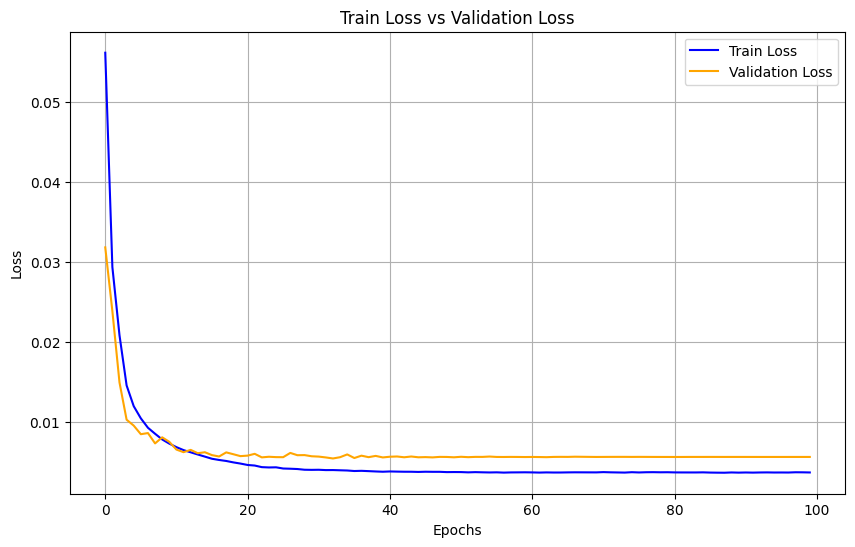

In [ ]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#保存模型
model_path = f'..//Model//WheatherLSTM_{device}.h5'
regressor.save(model_path)
print('Model Saved')

Model Saved


## 訓練迴歸模型

In [ ]:
TrainData = pd.read_csv(f"..//Data//MergedSorted//{device}_Merged_Sorted.csv")
TrainData.dropna(inplace=True)

In [ ]:
input_features_model_2 = [
    # 'Avg_WindSpeed(m/s)',
    # 'Avg_Pressure(hpa)',
    'Avg_Temperature(°C)',
    'Avg_Humidity(%)',
    'Avg_Sunlight(Lux)',
    # 'Avg_Power(mW)',
    
    # 'Avg_Diff_WindSpeed(m/s)',
    # 'Avg_Diff_Pressure(hpa)',
    'Avg_Diff_Temperature(°C)',
    'Avg_Diff_Humidity(%)',
    'Avg_Diff_Sunlight(Lux)',
    'Avg_Diff_Power(mW)',
    
    # 'Avg_Lag_1_WindSpeed(m/s)',
    # 'Avg_Lag_2_WindSpeed(m/s)',
    # 'Avg_Lag_1_Pressure(hpa)',
    # 'Avg_Lag_2_Pressure(hpa)',
    'Avg_Lag_1_Temperature(°C)',
    'Avg_Lag_2_Temperature(°C)',
    # 'Avg_Lag_3_Temperature(°C)',
    # 'Avg_Lag_4_Temperature(°C)',
    'Avg_Lag_1_Humidity(%)',
    'Avg_Lag_2_Humidity(%)',
    # 'Avg_Lag_3_Humidity(%)',
    # 'Avg_Lag_4_Humidity(%)',
    'Avg_Lag_1_Sunlight(Lux)',
    'Avg_Lag_2_Sunlight(Lux)',
    # 'Avg_Lag_3_Sunlight(Lux)',
    # 'Avg_Lag_4_Sunlight(Lux)',
    'Avg_Lag_1_Power(mW)',
    'Avg_Lag_2_Power(mW)',
    # 'Avg_Lag_3_Power(mW)',
    # 'Avg_Lag_4_Power(mW)',
    
    'Avg_Sin_Hour',
    'Avg_Cos_Hour',
    'Avg_Sin_Minute',
    'Avg_Cos_Minute',
    
    # 'Max_WindSpeed(m/s)',
    # 'Max_Pressure(hpa)',
    'Max_Temperature(°C)',
    'Max_Humidity(%)',
    'Max_Sunlight(Lux)',
    'Max_Power(mW)',
    'Max_Diff_WindSpeed(m/s)',
    'Max_Diff_Pressure(hpa)',
    'Max_Diff_Temperature(°C)',
    'Max_Diff_Humidity(%)',
    'Max_Diff_Sunlight(Lux)',
    'Max_Diff_Power(mW)',
    
    # 'Max_Lag_1_WindSpeed(m/s)',
    # 'Max_Lag_2_WindSpeed(m/s)',
    # 'Max_Lag_1_Pressure(hpa)',
    # 'Max_Lag_2_Pressure(hpa)',
    'Max_Lag_1_Temperature(°C)',
    'Max_Lag_2_Temperature(°C)',
    # 'Max_Lag_3_Temperature(°C)',
    # 'Max_Lag_4_Temperature(°C)',
    'Max_Lag_1_Humidity(%)',
    'Max_Lag_2_Humidity(%)',
    # 'Max_Lag_3_Humidity(%)',
    # 'Max_Lag_4_Humidity(%)',
    'Max_Lag_1_Sunlight(Lux)',
    'Max_Lag_2_Sunlight(Lux)',
    # 'Max_Lag_3_Sunlight(Lux)',
    # 'Max_Lag_4_Sunlight(Lux)',
    'Max_Lag_1_Power(mW)',
    'Max_Lag_2_Power(mW)',
    # 'Max_Lag_3_Power(mW)',
    # 'Max_Lag_4_Power(mW)',
    
    'Max_Sin_Hour',
    'Max_Cos_Hour',
    'Max_Sin_Minute',
    'Max_Cos_Minute',
    
    # 'Min_WindSpeed(m/s)',
    # 'Min_Pressure(hpa)',
    'Min_Temperature(°C)',
    'Min_Humidity(%)',
    'Min_Sunlight(Lux)',
    'Min_Power(mW)',
    
    # 'Min_Diff_WindSpeed(m/s)',
    # 'Min_Diff_Pressure(hpa)',
    'Min_Diff_Temperature(°C)',
    'Min_Diff_Humidity(%)',
    'Min_Diff_Sunlight(Lux)',
    'Min_Diff_Power(mW)',
    
    # 'Min_Lag_1_WindSpeed(m/s)',
    # 'Min_Lag_2_WindSpeed(m/s)',
    # 'Min_Lag_1_Pressure(hpa)',
    # 'Min_Lag_2_Pressure(hpa)',
    'Min_Lag_1_Temperature(°C)',
    'Min_Lag_2_Temperature(°C)',
    # 'Min_Lag_3_Temperature(°C)',
    # 'Min_Lag_4_Temperature(°C)',
    'Min_Lag_1_Humidity(%)',
    'Min_Lag_2_Humidity(%)',
    # 'Min_Lag_3_Humidity(%)',
    # 'Min_Lag_4_Humidity(%)',
    'Min_Lag_1_Sunlight(Lux)',
    'Min_Lag_2_Sunlight(Lux)',
    # 'Min_Lag_3_Sunlight(Lux)',
    # 'Min_Lag_4_Sunlight(Lux)',
    'Min_Lag_1_Power(mW)',
    'Min_Lag_2_Power(mW)',
    # 'Min_Lag_3_Power(mW)',
    # 'Min_Lag_4_Power(mW)',
    
    'Min_Sin_Hour',
    'Min_Cos_Hour',
    'Min_Sin_Minute',
    'Min_Cos_Minute'
]

In [ ]:
X_full = TrainData[input_features_model_2]

if 'Avg_Power(mW)' in input_features_model_2 :
    X_full = X_full.drop(columns='Avg_Power(mW)')
else:
    X_full = X_full
    
X_full = X_full.values
y_full = TrainData['Avg_Power(mW)'].values

X_train, X_val, y_train, y_val = train_test_split(X_full,y_full,test_size=0.2,shuffle=True)

reg_model = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=40),
    LinearRegression(),
)

cv_scores = cross_val_score(reg_model, X_train, y_train, cv=20)
cv_scores

array([0.99957419, 0.99987634, 0.99977457, 0.9999731 , 0.99961254,
       0.99963392, 0.99901891, 0.99986616, 0.99992038, 0.99992302,
       0.99975899, 0.99983189, 0.99995385, 0.99985846, 0.9998622 ,
       0.9999671 , 0.99981348, 0.99992944, 0.99974084, 0.99917644])

In [ ]:
reg_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=40)),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg_model.predict(X_val)
y_pred = y_pred = np.clip(y_pred, 0, None)

print('MSE: ',mean_squared_error(y_val, y_pred))
print('MAE: ',mean_absolute_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

MSE:  40.034703842768344
MAE:  2.6794001757031505
R2: 0.9997833659370217


In [ ]:
reg_model.fit(X_full, y_full)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=40)),
                ('linearregression', LinearRegression())])

## 預測答案

In [ ]:
#載入模型
model_path = f'..//Model//WheatherLSTM_{device}.h5'
model = load_model(model_path, compile=False)
print('Model Loaded Successfully')

Model Loaded Successfully


In [ ]:
TestData = pd.read_csv('..//Data/TestData//upload(no answer).csv')

TestData = TestData[TestData['序號'] % 100 == int(device[1:])]

to_predict_sequmber = TestData['序號'].to_list()

# 預測的資料 的 index
indices_1 = SourceData[SourceData['SeqNumber'].isin(to_predict_sequmber)][to_predict_features_model_1].index.to_list()
len(indices_1)

1440

In [ ]:
index_min = min(indices_1) - n_timesteps
index_max = max(indices_1)

indices_2 = SourceData.loc[index_min:index_max][to_predict_features_model_1].index.tolist()

# 找出有 NaN 的 row
rows_with_na = SourceData.loc[indices_2, to_predict_features_model_1].isnull().any(axis=1)
rows_with_na_data = SourceData.loc[indices_2, to_predict_features_model_1][rows_with_na]

# 有 NaN 的 row 的 index
indices_with_na =  rows_with_na_data.index.to_list()
len(indices_with_na)

6983

In [ ]:
 # 如果 LookBackNum > 12 選 indices_with_na
 # 其餘選 indices_1
PredictedData = SourceData.copy()
indices_to_use = indices_with_na if LookBackNum > 12 else indices_1

for index in indices_to_use:
    X = PredictedData.loc[index-LookBackNum : index-1].drop(columns="SeqNumber")
    # if 'Avg_Power(mW)' in X.columns.to_list():
    #     X = X.drop(columns='Avg_Power(mW)')
    
    X[to_predict_features_model_1] = preprocess_pipe.transform(X[to_predict_features_model_1])
    X = X.values
    X = np.reshape(X,(1, n_timesteps, n_features))
    
    pred = model.predict(X)
    pred = preprocess_pipe.inverse_transform(pred)
    PredictedData.loc[index, to_predict_features_model_1] = pred
    
    X = PredictedData.loc[index, input_features_model_2].to_frame().T
    if 'Avg_Power(mW)' in input_features_model_2:
        X = X.drop(columns='Avg_Power(mW)').values
    else:
        X = X.values
    
    pred = reg_model.predict(X)
    # pred = np.clip(pred, 0, None)
    PredictedData.loc[index, 'Avg_Power(mW)'] = pred

1/1 [==============================] - 0s 21ms/step


In [ ]:
PredictedData.loc[indices_to_use, 'Avg_Power(mW)'] = PredictedData.loc[indices_1, 'Avg_Power(mW)'].apply(lambda x: 0 if x <= 0 else x)

In [ ]:
PredictedData.loc[indices_1][['Min_Power(mW)','Avg_Power(mW)','Max_Power(mW)']]

,Min_Power(mW),Avg_Power(mW),Max_Power(mW)
1167,-18.654488,0.0,-37.660595
1168,-25.947571,0.0,-43.411644
1169,-29.972076,0.0,-58.573780
1170,-40.794407,0.0,-86.779121
1171,-59.663147,0.0,-112.722580
...,...,...,...
19002,-26.640696,0.0,-37.205635
19003,-15.742396,0.0,-40.063202
19004,-15.134768,0.0,-57.190685
19005,-19.994041,0.0,-69.408279


In [ ]:
PredictedData.loc[indices_1].to_csv(f'..//Data//PredictedData//Predicted_{device}.csv', index=False)
PredictedData.to_csv(f'..//Data//PredictedOverAllData//Predicted_OverAll_{device}.csv', index=False)

In [ ]:
# PredictedData = pd.read_csv(f'..//Data//PredictedData//Predicted_{device}.csv')

# X_Test = PredictedData[input_features_model_2].drop(columns=['Avg_Power(mW)']).values

# y_pred = reg_model.predict(X_Test)
# y_pred = np.clip(y_pred, 0, None)
# y_pred = y_pred.reshape(-1, 1)
# PredictedData[['Avg_Power(mW)']] = y_pred


In [ ]:
# PredictedData[['Min_Power(mW)','Avg_Power(mW)','Max_Power(mW)']]

In [ ]:
# PredictedData.to_csv(f'..//Data//PredictedData//Predicted_{device}.csv', index=False)